In [46]:
import pandas as pd

# Load the Excel file
file_path = 'raw_data_file.xlsx'  # Replace with the actual file path
excel_data = pd.ExcelFile(file_path)

# Load the sheets
raw_data = excel_data.parse('raw_data')  # Contains delivery information
lat_long_data = excel_data.parse('Lat_long(for ref)')  # Contains pin code lat-long data

# Show first few rows of each sheet to verify the structure
print(raw_data.head())
print(lat_long_data.head())


   ID Fulfillment Status Accepts Marketing  Subtotal  Shipping  Taxes   Total  \
0   1          fulfilled                no    1999.0       0.0    0.0  1999.0   
1   2          fulfilled                no    1999.0       0.0    0.0  1999.0   
2   3          fulfilled               yes    1999.0       0.0    0.0  1999.0   
3   4          fulfilled               yes    1999.0       0.0    0.0  1999.0   
4   5          fulfilled               yes    1999.0       0.0    0.0  1999.0   

  Discount Code  Discount Amount Shipping Method  ... Billing City  \
0           NaN              0.0        Standard  ...    Bengaluru   
1           NaN              0.0        Standard  ...      Gurgaon   
2           NaN              0.0        Standard  ...    Bangalore   
3           NaN              0.0        Standard  ...   Bengaluru    
4           NaN              0.0        Standard  ...    BENGALURU   

   Billing Zip Billing Province  Shipping City  Shipping Zip  \
0      '560064              

In [47]:
raw_data['Shipping Zip'] = raw_data['Shipping Zip'].astype(str).str.lstrip("'")
# Step 2: Set 'Shipping Zip' and 'Pin code' as index for both dataframes
print(raw_data.head())

   ID Fulfillment Status Accepts Marketing  Subtotal  Shipping  Taxes   Total  \
0   1          fulfilled                no    1999.0       0.0    0.0  1999.0   
1   2          fulfilled                no    1999.0       0.0    0.0  1999.0   
2   3          fulfilled               yes    1999.0       0.0    0.0  1999.0   
3   4          fulfilled               yes    1999.0       0.0    0.0  1999.0   
4   5          fulfilled               yes    1999.0       0.0    0.0  1999.0   

  Discount Code  Discount Amount Shipping Method  ... Billing City  \
0           NaN              0.0        Standard  ...    Bengaluru   
1           NaN              0.0        Standard  ...      Gurgaon   
2           NaN              0.0        Standard  ...    Bangalore   
3           NaN              0.0        Standard  ...   Bengaluru    
4           NaN              0.0        Standard  ...    BENGALURU   

   Billing Zip Billing Province  Shipping City  Shipping Zip  \
0      '560064              

In [52]:
clean_data= raw_data.dropna(subset='Shipping Zip')
print(raw_data['Shipping Zip'].isnull().sum())

0


In [53]:
print(lat_long_data['Pin code'].isnull().sum())

0


In [67]:
print(clean_data['Shipping City'].unique())

['Bengaluru' 'Gurgaon' 'Bangalore' 'Bengaluru ' 'BENGALURU' 'Salem '
 'Bangalore ' 'Bhopal' 'Visakhapatnam' 'Gurugram' 'Ranchi' 'Pune'
 'Ahmedabad ' 'Hyderabad' 'Vizag' 'BANGALORE' 'Mumbai' 'Calcutta'
 'Gurgoan' 'New Delhi' 'mumbai' 'hyderabad' nan 'bengaluru' 'jalore'
 'Ulsoor' 'Noida' 'Delhi' 'Surat' 'Kolkata' 'Greater Noida' 'Mumbai '
 'Chandhigaru' 'Ambarnath east ' 'Bagalore' 'Howrah' 'Ahmedabad' 'Khanvel'
 'MUMBAI' 'Jaipur' 'Jabalpur' 'Gandhinagar' 'lucknow' 'Mangalore'
 'New Delhi ' 'Defence officers apartment Dwarka , New Delhi' 'Rajkot'
 'Ambernath' 'Thane' 'Aurangabad ' 'BENGALURU ' 'Digboi'
 'North West Delhi' 'Dehradun' 'Ulhasnagar' 'Kamothe, Navi Mumbai '
 'Ludhianaâ€™s' 'Margao ' 'New delhi' 'Margao' 'Sangli' 'Moradabad'
 'Ajmer' 'Chennai' 'Balangir' 'Ludhiana' 'Sagar' 'NEW DELHI' 'Akola'
 'Bhatapara ' 'Mysuru' 'Mandla' 'Coimbatore' 'Lucknow' 'Faridabad'
 'Thane ' 'New floorNew delhi' 'Udaipur' 'Delhi ' 'Bengaluru (Karnataka)'
 'kolkata' 'Navalur' 'Guwahati' 'Mulund' 'Vad

In [55]:
lat_long_data['Pin code']= lat_long_data['Pin code'].astype("str")
clean_data['Shipping Zip']= clean_data['Shipping Zip'].astype("str")

In [56]:
merged_data = pd.merge(raw_data, lat_long_data, left_on='Shipping Zip', right_on='Pin code', how='right')
print(merged_data.head())

        ID Fulfillment Status Accepts Marketing  Subtotal  Shipping  Taxes  \
0  13643.0          fulfilled               yes    1999.0       0.0    0.0   
1  13671.0          fulfilled               yes    1999.0       0.0    0.0   
2  13699.0          fulfilled               yes    1999.0       0.0    0.0   
3  13727.0          fulfilled               yes    1999.0       0.0    0.0   
4  13755.0          fulfilled               yes    1999.0       0.0    0.0   

    Total Discount Code  Discount Amount Shipping Method  ... Shipping City  \
0  1999.0           NaN              0.0        Standard  ...     New Delhi   
1  1999.0           NaN              0.0        Standard  ...     New Delhi   
2  1999.0           NaN              0.0        Standard  ...     New Delhi   
3  1999.0           NaN              0.0        Standard  ...     New Delhi   
4  1999.0           NaN              0.0        Standard  ...     New Delhi   

   Shipping Zip Shipping Province  Risk Level  Source  B

In [57]:
demand_data = merged_data.groupby(['Shipping Zip', 'Shipping City', 'Lat', 'Long'])['Lineitem quantity'].sum().reset_index()

C:\Users\athar\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


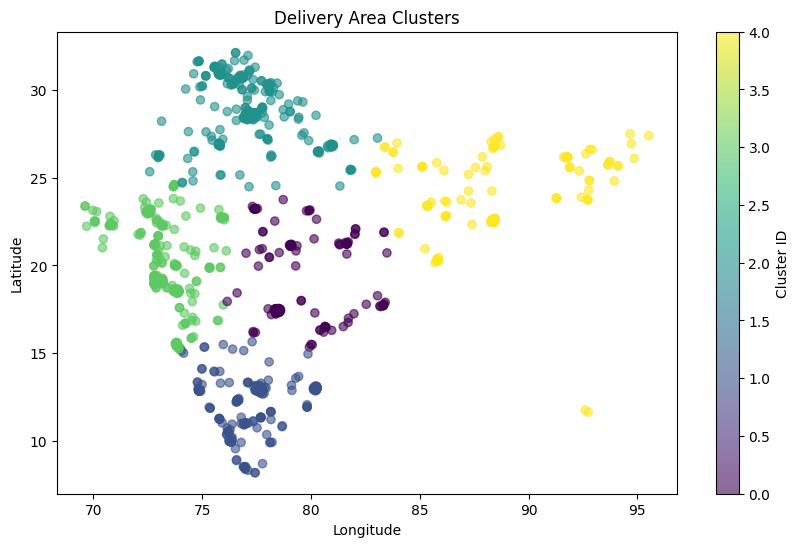

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3: Perform KMeans clustering to identify clusters of high delivery demand
# Number of clusters (this can be adjusted based on the dataset size or using the Elbow method)
num_clusters = 5  # Start with 5 clusters as an example

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
demand_data['Cluster'] = kmeans.fit_predict(demand_data[['Lat', 'Long']])

# Step 4: Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(demand_data['Long'], demand_data['Lat'], c=demand_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Delivery Area Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster ID')
plt.show()


In [59]:
# Step 5: Summarize the demand by cluster
cluster_summary = demand_data.groupby('Cluster').agg({
    'Lineitem quantity': 'sum',
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

# Sort clusters by demand
cluster_summary = cluster_summary.sort_values(by='Lineitem quantity', ascending=False)

# Check the cluster summary to see the demand and location of each cluster
print(cluster_summary)


   Cluster  Lineitem quantity        Lat       Long
3        3            51888.0  19.630416  73.173409
2        2            34640.0  28.738068  77.164662
1        1            27552.0  12.475552  77.597218
0        0            12576.0  18.741636  79.293059
4        4             6352.0  23.887978  88.637994


Top proposed warehouse locations:
   Cluster        Lat       Long  Lineitem quantity
3        3  19.630416  73.173409            51888.0
2        2  28.738068  77.164662            34640.0
1        1  12.475552  77.597218            27552.0


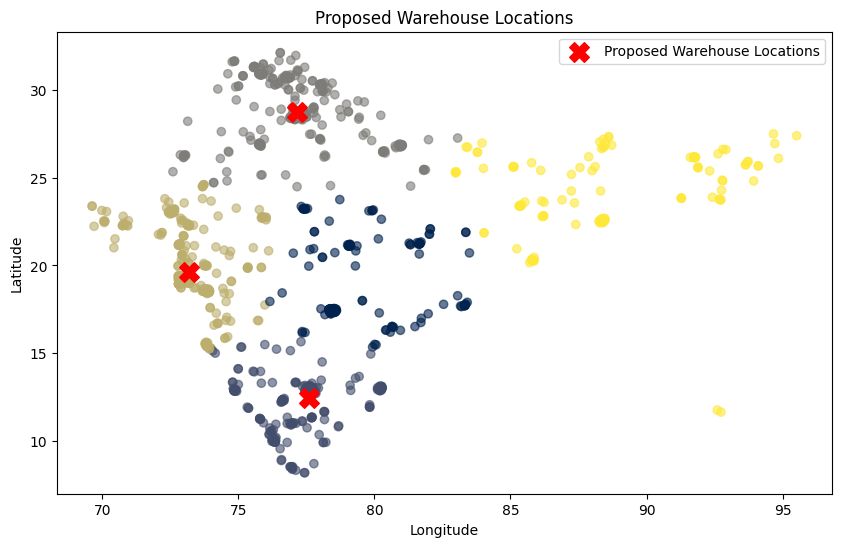

In [63]:
# Step 6: Display the top warehouse locations based on the demand
top_warehouses = cluster_summary.head(3)  # You can adjust the number of warehouses as needed
print("Top proposed warehouse locations:")
print(top_warehouses[['Cluster', 'Lat', 'Long', 'Lineitem quantity']])

# Visualize the top warehouse locations on the map
plt.figure(figsize=(10, 6))
plt.scatter(demand_data['Long'], demand_data['Lat'], c=demand_data['Cluster'], cmap='cividis', alpha=0.6)
plt.scatter(top_warehouses['Long'], top_warehouses['Lat'], color='red', marker='X', s=200, label='Proposed Warehouse Locations')
plt.title('Proposed Warehouse Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [61]:
# Step 7: Calculate the central (centroid) location of each cluster based on mean latitudes and longitudes
central_locations = demand_data.groupby('Cluster').agg({
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

# Step 8: Display the central locations for each cluster
print("Central (centroid) locations of each cluster:")
print(central_locations)


Central (centroid) locations of each cluster:
   Cluster        Lat       Long
0        0  18.741636  79.293059
1        1  12.475552  77.597218
2        2  28.738068  77.164662
3        3  19.630416  73.173409
4        4  23.887978  88.637994


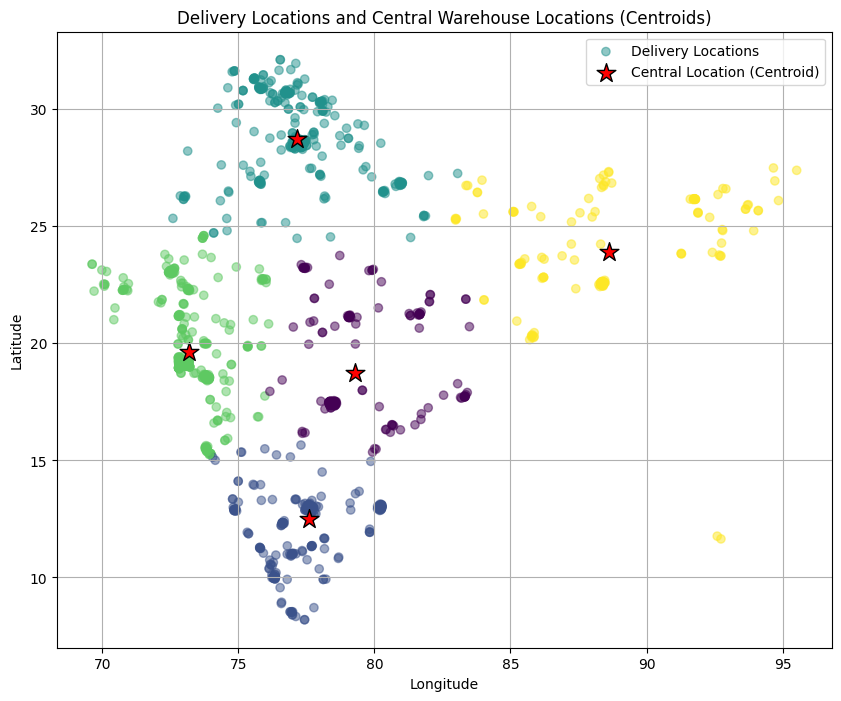

In [66]:
import matplotlib.pyplot as plt

# Step 1: Scatter plot of all delivery points colored by cluster
plt.figure(figsize=(10, 8))

# Scatter plot for deliveries, colored by cluster
plt.scatter(demand_data['Long'], demand_data['Lat'], c=demand_data['Cluster'], cmap='viridis', label='Delivery Locations', alpha=0.5)

# Step 2: Plot the central locations (centroids) on top of the delivery points
plt.scatter(central_locations['Long'], central_locations['Lat'], color='red', marker='*', s=200, label='Central Location (Centroid)', edgecolors='black')

# Step 3: Label the plot
plt.title('Delivery Locations and Central Warehouse Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
